In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('./source-data/big-mac-source-data.csv', parse_dates = ['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1876 entries, 0 to 1875
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   name           1876 non-null   object        
 1   iso_a3         1876 non-null   object        
 2   currency_code  1876 non-null   object        
 3   local_price    1876 non-null   float64       
 4   dollar_ex      1876 non-null   float64       
 5   GDP_dollar     1263 non-null   float64       
 6   date           1876 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 102.7+ KB


In [3]:
print(min(df['date']))
print(max(df['date']))

2000-04-01 00:00:00
2022-01-01 00:00:00


In [4]:
df = df.sort_values(by = ['date', 'name'])

In [5]:
df.head()

,name,iso_a3,currency_code,local_price,dollar_ex,GDP_dollar,date
0,Argentina,ARG,ARS,2.50,1.000000,NaN,2000-04-01
1,Australia,AUS,AUD,2.59,1.680000,NaN,2000-04-01
2,Brazil,BRA,BRL,2.95,1.790000,NaN,2000-04-01
3,Britain,GBR,GBP,1.90,0.632911,NaN,2000-04-01
4,Canada,CAN,CAD,2.85,1.470000,NaN,2000-04-01


In [6]:
df.tail()

,name,iso_a3,currency_code,local_price,dollar_ex,GDP_dollar,date
1803,United Arab Emirates,ARE,AED,17.00,3.67305,38661.18,2022-01-01
1872,United States,USA,USD,5.81,1.00000,63358.49,2022-01-01
1871,Uruguay,URY,UYU,239.00,44.03550,16023.35,2022-01-01
1873,Venezuela,VEN,VES,23.00,4.54350,1690.66,2022-01-01
1874,Vietnam,VNM,VND,69000.00,22650.00000,3522.51,2022-01-01


### Data Preprocessing

In [7]:
df['dollar_price'] = df['local_price'] / df['dollar_ex']

In [8]:
selected_countries = ['ARG', 'AUS', 'BRA', 'GBR', 'CAN', 'CHL', 'CHN', 'CZE', 'DNK', 'EGY', 
                      'HKG', 'HUN', 'IDN', 'ISR', 'JPN', 'MYS', 'MEX', 'NZL', 'NOR', 'PER', 
                      'PHL', 'POL', 'RUS', 'SAU', 'SGP', 'ZAF', 'KOR', 'SWE', 'CHE', 'TWN', 
                      'THA', 'TUR', 'ARE', 'USA', 'COL', 'CRI', 'PAK', 'LKA', 'UKR', 'URY', 
                      'IND', 'VNM', 'GTM', 'HND', 'VEN', 'NIC', 'AZE', 'BHR', 'HRV', 'JOR', 
                      'KWT', 'LBN', 'MDA', 'OMN', 'QAT', 'ROU', 'EUZ']

In [9]:
regression_countries = ['ARG', 'AUS', 'BRA', 'GBR', 'CAN', 'CHL', 'CHN', 'CZE', 'DNK', 'EGY', 
                        'EUZ', 'HKG', 'HUN', 'IDN', 'ISR', 'JPN', 'MYS', 'MEX', 'NZL', 'NOR', 
                        'PER', 'PHL', 'POL', 'RUS', 'SAU', 'SGP', 'ZAF', 'KOR', 'SWE', 'CHE', 
                        'TWN', 'THA', 'TUR', 'USA', 'COL', 'PAK', 'IND', 'AUT', 'BEL', 'NLD', 
                        'FIN', 'FRA', 'DEU', 'IRL', 'ITA', 'PRT', 'ESP', 'GRC', 'EST']

regression_addons = ['ARE', 'CRI', 'LKA', 'UKR', 'URY', 'VNM', 'GTM', 'HND', 'NIC', 'AZE', 
                     'BHR', 'HRV', 'JOR', 'KWT', 'MDA', 'OMN', 'QAT', 'ROU', 'SVK', 'SVN', 
                     'LVA', 'LTU']

In [10]:
currencies = ['USD', 'EUR', 'GBP', 'JPY', 'CNY']

In [11]:
df_raw_index = df[df['iso_a3'].isin(selected_countries)][['date', 'name', 'iso_a3', 'currency_code', 'local_price', 'dollar_ex', 'dollar_price']]

In [12]:
df_adj_index = df[~ df['GDP_dollar'].isna()]
df_adj_index = df_adj_index[(df_adj_index['iso_a3'].isin(regression_countries)) | ((df_adj_index['date'] >= '2021-01-01') & (df_adj_index['iso_a3'].isin(regression_addons)))]

### Big Mac Raw Index

In [13]:
df_raw_index_fn = pd.DataFrame()

for period in df_raw_index['date'].drop_duplicates():
    df_in_specific_year = df_raw_index.query('date == @period')
    
    for currency in currencies:
        # Scalar (Dollar price in base currency)
        curr_in_dollar_price = df_in_specific_year.query('currency_code == @currency')['dollar_price'].item()
        # Series (Dollar price in each country / Dollar price in base currency)
        df_in_specific_year[currency] = round((df_in_specific_year['dollar_price'] / curr_in_dollar_price) - 1, 5)
        
    df_raw_index_fn = pd.concat([df_in_specific_year, df_raw_index_fn], ignore_index = True)

<ipython-input-13-f6bbdae789a3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_in_specific_year[currency] = round((df_in_specific_year['dollar_price'] / curr_in_dollar_price) - 1, 5)


In [14]:
df_raw_index_fn.tail()

,date,name,iso_a3,currency_code,local_price,dollar_ex,dollar_price,USD,EUR,GBP,JPY,CNY
1573,2000-04-01,Sweden,SWE,SEK,24.00,8.84,2.714932,0.08165,0.14034,-0.09563,-0.02115,1.27067
1574,2000-04-01,Switzerland,CHE,CHF,5.90,1.70,3.470588,0.38270,0.45774,0.15609,0.25130,1.90267
1575,2000-04-01,Taiwan,TWN,TWD,70.00,30.60,2.287582,-0.08861,-0.03915,-0.23798,-0.17523,0.91325
1576,2000-04-01,Thailand,THA,THB,55.00,38.00,1.447368,-0.42336,-0.39207,-0.51787,-0.47816,0.21053
1577,2000-04-01,United States,USA,USD,2.51,1.00,2.510000,0.00000,0.05427,-0.16389,-0.09503,1.09927


### Big Mac Adjusted Index

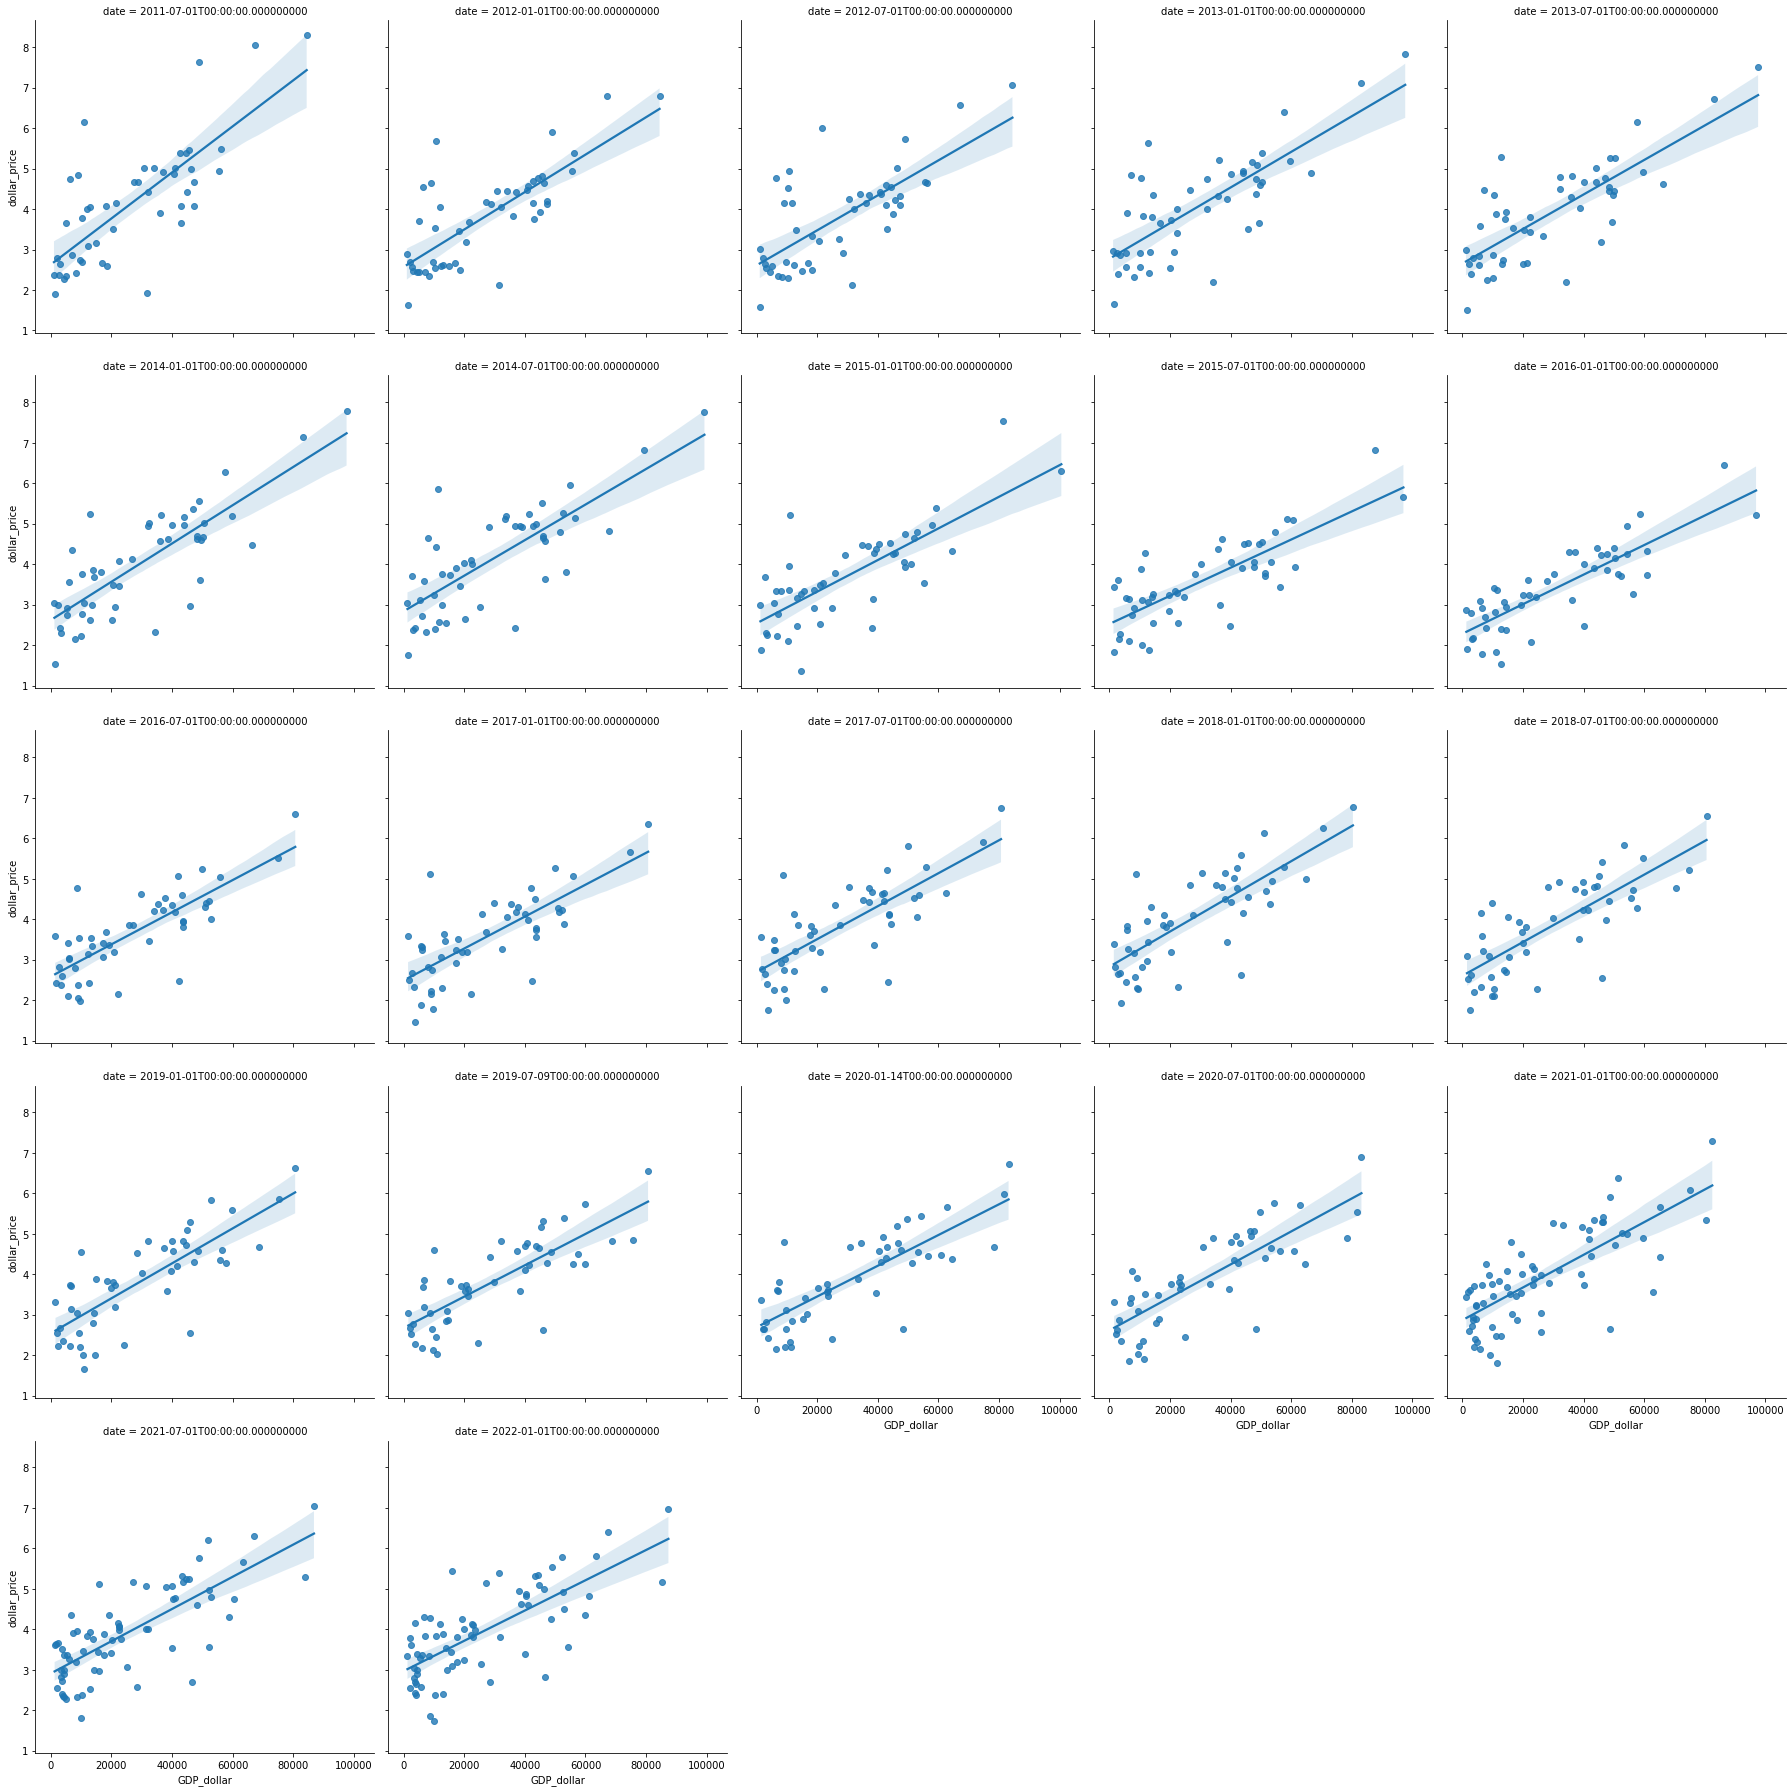

In [15]:
sns.lmplot(data = df_adj_index, x = 'GDP_dollar', y = 'dollar_price', 
           col = 'date', col_wrap = 5);

In [16]:
lr_model = LinearRegression()

df_adj_index_price = pd.DataFrame()

for period in df_adj_index['date'].drop_duplicates():
    df_in_specific_year = df_adj_index.query('date == @period')
    
    X = df_in_specific_year[['GDP_dollar']]   # 2D array
    y = df_in_specific_year['dollar_price']   # 1D array
    
    lr_model.fit(X, y)
    df_in_specific_year['adj_price'] = lr_model.predict(X)
    
    df_adj_index_price = pd.concat([df_adj_index_price, df_in_specific_year], ignore_index = True)

<ipython-input-16-5e3b6cccc5bf>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_in_specific_year['adj_price'] = lr_model.predict(X)
<ipython-input-16-5e3b6cccc5bf>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_in_specific_year['adj_price'] = lr_model.predict(X)
<ipython-input-16-5e3b6cccc5bf>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [17]:
df_adj_index_price = df_adj_index_price[
    ((df_adj_index_price['iso_a3'].isin(regression_countries)) | ((df_adj_index_price['date'] >= '2021-01-01') & (df_adj_index_price['iso_a3'].isin(regression_addons))))
    &
    (df_adj_index_price['iso_a3'].isin(selected_countries))
][['date', 'iso_a3', 'currency_code', 'name', 'local_price', 'dollar_ex', 'dollar_price', 'GDP_dollar', 'adj_price']]

In [18]:
df_adj_index_fn = pd.DataFrame()

for period in df_adj_index_price['date'].drop_duplicates():
    df_in_specific_year = df_adj_index_price.query('date == @period')
    
    for currency in currencies:
        curr_in_dollar_price = df_in_specific_year.query('currency_code == @currency')['dollar_price'].item()
        curr_in_adj_price = df_in_specific_year.query('currency_code == @currency')['adj_price'].item()
        
        # Series (Dollar price in each country / Adjusted price in each country)
        numerator = df_in_specific_year['dollar_price'] / df_in_specific_year['adj_price']
        # Scalar (Dollar price in base currency / Adjusted price in base currency)
        denominator = curr_in_dollar_price / curr_in_adj_price

        df_in_specific_year[currency] = round((numerator / denominator) - 1, 5)
        
    df_adj_index_fn = pd.concat([df_in_specific_year, df_adj_index_fn], ignore_index = True)

<ipython-input-18-7366c75a900c>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_in_specific_year[currency] = round((numerator / denominator) - 1, 5)


In [19]:
df_adj_index_fn.tail()

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,GDP_dollar,adj_price,USD,EUR,GBP,JPY,CNY
862,2011-07-01,CHE,CHF,Switzerland,6.500,0.80615,8.063016,67245.997,6.455699,0.63457,0.19918,0.50354,0.54951,0.58200
863,2011-07-01,TWN,TWD,Taiwan,75.000,28.83400,2.601096,18457.752,3.679977,-0.07496,-0.32136,-0.14911,-0.12309,-0.10471
864,2011-07-01,THA,THB,Thailand,70.000,29.75000,2.352941,4991.525,2.913840,0.05680,-0.22469,-0.02791,0.00181,0.02282
865,2011-07-01,TUR,TRY,Turkey,6.500,1.72285,3.772818,10398.685,3.221471,0.53271,0.12445,0.40985,0.45296,0.48342
866,2011-07-01,USA,USD,United States,4.065,1.00000,4.065000,47283.633,5.319976,0.00000,-0.26637,-0.08016,-0.05203,-0.03216


In [20]:
df_full_index = df_raw_index_fn.merge(df_adj_index_fn, 
                                      on = ['date', 'iso_a3', 'currency_code', 'name', 'local_price', 'dollar_ex', 'dollar_price'],
                                      how = 'left',
                                      suffixes = ['_raw', '_adj']).sort_values(by = ['date', 'name'])

In [21]:
df_full_index.reset_index(drop = True, inplace = True)
df_full_index

,date,name,iso_a3,currency_code,local_price,dollar_ex,dollar_price,USD_raw,EUR_raw,GBP_raw,JPY_raw,CNY_raw,GDP_dollar,adj_price,USD_adj,EUR_adj,GBP_adj,JPY_adj,CNY_adj
0,2000-04-01,Argentina,ARG,ARS,2.50,1.000000,2.500000,-0.00398,0.05007,-0.16722,-0.09864,1.09091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-04-01,Australia,AUS,AUD,2.59,1.680000,1.541667,-0.38579,-0.35246,-0.48645,-0.44416,0.28939,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-04-01,Brazil,BRA,BRL,2.95,1.790000,1.648045,-0.34341,-0.30778,-0.45102,-0.40581,0.37836,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-04-01,Britain,GBR,GBP,1.90,0.632911,3.002000,0.19602,0.26092,0.00000,0.08235,1.51076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-04-01,Canada,CAN,CAD,2.85,1.470000,1.938776,-0.22758,-0.18566,-0.35417,-0.30099,0.62152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573,2022-01-01,United Arab Emirates,ARE,AED,17.00,3.673050,4.628306,-0.20339,-0.06590,-0.03908,0.36743,0.20741,38661.18,4.413244,-0.03675,-0.06938,-0.02497,0.38396,-0.08048
1574,2022-01-01,United States,USA,USD,5.81,1.000000,5.810000,0.00000,0.17260,0.20626,0.71656,0.51568,63358.49,5.336460,0.00000,-0.03388,0.01222,0.43675,-0.04540
1575,2022-01-01,Uruguay,URY,UYU,239.00,44.035500,5.427439,-0.06585,0.09539,0.12684,0.60353,0.41588,16023.35,3.567014,0.39755,0.35020,0.41463,1.00793,0.33410
1576,2022-01-01,Venezuela,VEN,VES,23.00,4.543500,5.062177,-0.12871,0.02167,0.05100,0.49561,0.32060,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Other Country Data

In [22]:
cols = ['ISO', 'Country', 'Subject Descriptor', 'Units', 'Scale']
cols += [str(year) for year in range(2000, 2023)]

In [23]:
df_weo = pd.read_csv('./source-data/WEO_Data.txt', 
                     delimiter = '\t', encoding = 'ISO-8859-1', 
                     header = 0, usecols = cols, skipfooter = 2, index_col = False)

<ipython-input-23-c8c6edecf676>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df_weo = pd.read_csv('./source-data/WEO_Data.txt',


In [24]:
# Combine columns 
df_weo['Full Subject Descriptor'] = df_weo['Subject Descriptor'] + ' (' + df_weo['Units'] + ')'
df_weo_combined = df_weo.drop(columns = ['Subject Descriptor', 'Units', 'Scale'])
df_weo_combined.head()

,ISO,Country,2000,2001,2002,2003,2004,2005,2006,2007,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Full Subject Descriptor
0,AFG,Afghanistan,NaN,NaN,"9,555.40","11,296.10","12,166.14","14,557.09","16,012.96","19,062.11",...,"42,862.46","43,150.71","41,880.72","43,281.49","42,015.52","45,639.64","46,972.10",NaN,NaN,"Gross domestic product per capita, current pri..."
1,AFG,Afghanistan,NaN,NaN,233.433,233.755,254.259,294.396,320.674,381.502,...,746.922,705.597,617.126,635.789,582.323,586.204,611.268,NaN,NaN,"Gross domestic product per capita, current pri..."
2,AFG,Afghanistan,NaN,NaN,31.263,42.413,49.351,54.566,58.269,63.327,...,101.97,101.296,105.736,110.998,111.693,114.264,120.671,NaN,NaN,"Inflation, average consumer prices (Index)"
3,AFG,Afghanistan,NaN,NaN,NaN,35.663,16.358,10.569,6.785,8.681,...,4.674,-0.662,4.384,4.976,0.626,2.302,5.607,NaN,NaN,"Inflation, average consumer prices (Percent ch..."
4,AFG,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unemployment rate (Percent of total labor force)


In [25]:
# Unpivot columns (Identifier variables; Measured variables)
df_weo_melted = df_weo_combined.melt(id_vars = ['ISO', 'Country', 'Full Subject Descriptor'], 
                                     var_name = 'Year', value_name = 'Value')
df_weo_melted.head()

,ISO,Country,Full Subject Descriptor,Year,Value
0,AFG,Afghanistan,"Gross domestic product per capita, current pri...",2000,NaN
1,AFG,Afghanistan,"Gross domestic product per capita, current pri...",2000,NaN
2,AFG,Afghanistan,"Inflation, average consumer prices (Index)",2000,NaN
3,AFG,Afghanistan,"Inflation, average consumer prices (Percent ch...",2000,NaN
4,AFG,Afghanistan,Unemployment rate (Percent of total labor force),2000,NaN


In [26]:
# Pivot columns (Subject Descriptor)
df_weo_pivoted = df_weo_melted.set_index(['ISO', 'Country', 'Year', 'Full Subject Descriptor'])['Value'].unstack().reset_index()
df_weo_pivoted.columns.name = None
df_weo_pivoted.head()

,ISO,Country,Year,"Gross domestic product per capita, current prices (National currency)","Gross domestic product per capita, current prices (U.S. dollars)","Inflation, average consumer prices (Index)","Inflation, average consumer prices (Percent change)",Unemployment rate (Percent of total labor force)
0,ABW,Aruba,2000,"37,019.03","20,681.02",82.632,4.049,6.923
1,ABW,Aruba,2001,"37,124.84","20,740.13",85.013,2.882,6.489
2,ABW,Aruba,2002,"38,139.97","21,307.25",87.832,3.316,8.131
3,ABW,Aruba,2003,"39,289.58","21,949.49",91.043,3.656,11.4
4,ABW,Aruba,2004,"42,424.13","23,700.63",93.346,2.529,9.5


In [27]:
df_full_index['year'] = df_full_index['date'].dt.year
df_weo_pivoted['Year'] = df_weo_pivoted['Year'].astype(int)

df_fn = df_full_index.merge(df_weo_pivoted, how = 'left',
                            left_on = ['iso_a3', 'name', 'year'], 
                            right_on = ['ISO', 'Country', 'Year']).drop(columns = ['Year', 'Country', 'ISO'])

In [28]:
cols = list(df_fn.columns)
reordered_cols = [cols[-6]] + cols[:-6] + cols[-5:]
df_fn = df_fn[reordered_cols]
df_fn

,year,date,name,iso_a3,currency_code,local_price,dollar_ex,dollar_price,USD_raw,EUR_raw,...,USD_adj,EUR_adj,GBP_adj,JPY_adj,CNY_adj,"Gross domestic product per capita, current prices (National currency)","Gross domestic product per capita, current prices (U.S. dollars)","Inflation, average consumer prices (Index)","Inflation, average consumer prices (Percent change)",Unemployment rate (Percent of total labor force)
0,2000,2000-04-01,Argentina,ARG,ARS,2.50,1.000000,2.500000,-0.00398,0.05007,...,NaN,NaN,NaN,NaN,NaN,"8,638.54","8,638.54",26.153,-0.939,17.134
1,2000,2000-04-01,Australia,AUS,AUD,2.59,1.680000,1.541667,-0.38579,-0.35246,...,NaN,NaN,NaN,NaN,NaN,"35,808.20","20,850.53",71.475,4.457,6.292
2,2000,2000-04-01,Brazil,BRA,BRL,2.95,1.790000,1.648045,-0.34341,-0.30778,...,NaN,NaN,NaN,NaN,NaN,"6,900.62","3,772.05","10,780,490,489,263.20",7.044,13.9
3,2000,2000-04-01,Britain,GBR,GBP,1.90,0.632911,3.002000,0.19602,0.26092,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,2000-04-01,Canada,CAN,CAD,2.85,1.470000,1.938776,-0.22758,-0.18566,...,NaN,NaN,NaN,NaN,NaN,"36,090.21","24,296.72",95.375,2.719,6.833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573,2022,2022-01-01,United Arab Emirates,ARE,AED,17.00,3.673050,4.628306,-0.20339,-0.06590,...,-0.03675,-0.06938,-0.02497,0.38396,-0.08048,"164,354.88","44,752.86",284.031,2.181,NaN
1574,2022,2022-01-01,United States,USA,USD,5.81,1.000000,5.810000,0.00000,0.17260,...,0.00000,-0.03388,0.01222,0.43675,-0.04540,"74,725.00","74,725.00",279.262,3.456,3.525
1575,2022,2022-01-01,Uruguay,URY,UYU,239.00,44.035500,5.427439,-0.06585,0.09539,...,0.39755,0.35020,0.41463,1.00793,0.33410,"789,752.35","17,930.51",247.309,6.136,9.233
1576,2022,2022-01-01,Venezuela,VEN,VES,23.00,4.543500,5.062177,-0.12871,0.02167,...,NaN,NaN,NaN,NaN,NaN,"47,562,240,013.64","1,617.76","52,751,986,703,437.00","2,000.00",NaN
